# Project: Clean and Analyze Employee Exit Surveys

In [13]:
# Importing libraries used throughout this lession
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Project Overview
---

This project will, as the title suggests, clean and analyse employee exit surveys from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Theoretical stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**Datasets used in this project:**

- `dete_survey.csv`

- `tafe_survey.csv`

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's - employment (in years)

**Tools used so far in this course:**

Vectorized string methods to clean string columns

- The `apply()`, `map()`, and `applymap()` methods to transform data
- The `fillna()`, `dropna()`, and `drop()` methods to drop missing or unnecessary values
- The `melt()` function to reshape data
- The `concat()` and `merge()` functions to combine data


## 2. Initial Exploration of Data
---

In [14]:
# reading datasets as pandas dataframes
dete_survey = pd.read_csv('data/dete_survey.csv')
tafe_survey = pd.read_csv('data/tafe_survey.csv')

In [15]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [16]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [17]:
pd.options.display.max_columns = 150 # to avoid truncated output 
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [18]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [19]:
# checking number of NaN entries pre column in dete df
print(dete_survey.isnull().sum().sort_values())

ID                                       0
Workload                                 0
Work life balance                        0
Traumatic incident                       0
Ill Health                               0
Study/Travel                             0
Relocation                               0
Maternity/family                         0
Employment conditions                    0
Work location                            0
Lack of job security                     0
Lack of recognition                      0
Physical work environment                0
Dissatisfaction with the department      0
None of the above                        0
Interpersonal conflicts                  0
Job dissatisfaction                      0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Career move to public sector             0
Career move to private sector            0
Region     

In [20]:
# checking number of NaN entries pre column in tafe df
print(tafe_survey.isnull().sum().sort_values())

Record ID                                                          0
Institute                                                          0
WorkArea                                                           0
Reason for ceasing employment                                      1
CESSATION YEAR                                                     7
                                                                ... 
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Ill Health                                 265
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Main Factor. Which of these was the main factor for leaving?     589
Length: 72, dtype: int64


In [21]:
# print df dimensions
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


**Observations From Above**

- Both df's have a number of `NaN` entries

- The column names are different between both df's and the tafe df's column names are difficult to read/use

- Most columns in both df's are of type string (pandas object)

- The dimensions of the df's does not match

- dete_survey has `Not Stated` entries for `NaN` entries. Similary tafe_survey has `-` entries for `NaN` 

- Both datasets have columns that are not needed

- As per above, there are repeat columns in each dataset with difference column names

## 3. Identify Missing Values and Drop Unnecessary Columns
---

In [22]:
# Reading 'Not Stated' values in as NaN
dete_survey = pd.read_csv('data/dete_survey.csv', na_values=['Not Stated'])

In [23]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [24]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [25]:
# Drop columns from each dataframe that are not required
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [26]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [27]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

**Observation from above:**

Clearly are there are overlaps in the datasets, but the column names do align very well so the next step is to clear these names up a bit.

## 4. Cleaning Column Names
---

In [28]:
# Cleaning/standardising up dete_survey column names
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(
                                '\s+', '_', regex=True  # adding '_'between words
                                ).str.strip(            # removing blank chars at start and end of string
                                ).str.lower(            # making all chars lower case
                                )



dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [29]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [30]:
# The tafe_survey column names are less tidy so renaming them manually with pattern map below

pattern_map = {'Record ID': 'id',
              'CESSATION YEAR': 'cease_date',
              'Reason for ceasing employment': 'separationtype',
              'Gender. What is your Gender?': 'gender',
              'CurrentAge. Current Age': 'age',
              'Employment Type. Employment Type': 'employment_status',
              'Classification. Classification': 'position',
              'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
              'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
              }

tafe_survey_updated = tafe_survey_updated.rename(columns=pattern_map) # renaming columns
# or like this >>> afe_survey_updated = tafe_survey_updated.rename(pattern_map, axis=1)

tafe_survey_updated.columns # display update column names

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [31]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Observation from above:**

 - The column names are now easier to work with, but not all like-for-like columns in both datasets share the same column name
 
 - When comparing entries in columns from both datasets, for exampele `separationtype`, it can be seen that the descriptors/entries are not the same.

## 5. Filtering the Data
---

In [32]:
dete_survey_updated['separationtype'].head()

0               Ill Health Retirement
1    Voluntary Early Retirement (VER)
2    Voluntary Early Retirement (VER)
3           Resignation-Other reasons
4                      Age Retirement
Name: separationtype, dtype: object

In [33]:
tafe_survey_updated['separationtype'].head()

0    Contract Expired
1          Retirement
2          Retirement
3         Resignation
4         Resignation
Name: separationtype, dtype: object

In [34]:
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [35]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

**Observation from above**

Entries in the  `separationtype` columns of both datasets are not the same. For the purpose of this project we are interested in way people resigned. The dete_survey dataframe has entries for this description of `Resignation-...` whereas, the tafe_survey dataframe has entries of `Resignation`

In [36]:
# Using boolean indexing to create a dataframe of row with only resignation data
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Other employer') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')
                                       ].copy()

In [37]:
# Update all separation types containing the word "Resignation-..." to just 'Resignation'
# Note this could have been done with the dete_survey_updated dataframe to avoid the lengthy boolean indexing above
dete_resignations['separationtype'] = dete_resignations['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_resignations['separationtype'].value_counts()

separationtype
Resignation    311
Name: count, dtype: int64

In [38]:
dete_resignations.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [39]:
# Using boolen indexing to create a dataframe of row with only resignation data
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10


**Observation from above**

The new dataframes `dete_resignations` and `tafe_resignations` now contain only rows with the entrie `Resignation` 

## 6. Verify the Data
---

To verify our data we will start by considering the start and finish dates of employment and ensure they are within a reasonble year

### 6.1 Verify & Cleaning `cease_date` Column of `dete_resignations` Dataframe

In [40]:
# check unique entries in 'cease_date' column of dete dataframe
# Witha dataframe use >>> dete_resignations[['cease_date', 'dete_start_date']].apply(pd.Series.value_counts)
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [41]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
# This one is return less data? dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'/(\d{4})')
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

cease_date
2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: count, dtype: int64

### 6.2 Verify & Cleaning `dete_start_date` Column of `dete_resignations` Dataframe

In [42]:
# Now repeating the above check for 'dete_start_date' column of dete datframe
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

dete_start_date
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: count, dtype: int64

In [43]:
# The above entries format looks fine so just converting to float
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype('float')

### 6.3 Verify & Cleaning `cease_date` Column of `tafe_resignations` Dataframe

In [44]:
# Check entries for formatting
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

cease_date
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: count, dtype: int64

In [45]:
# The above entries format looks fine so just converting to float
tafe_resignations['cease_date'] = tafe_resignations['cease_date'].astype('float')


**Observation from above**

The end years are recent, whereas the start dates span many decades. However, there is a concentration of start years more recently. This indicates that people are resigning now, whereas in previous decades dating before the 2000's there were no resignations.

## 7. Adding a Years of Service Column to dete dataset
---

A reminder the aim of this project is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

The `tafe_resignations` dataframe already contains a service column called `institute_service`, whereas the `dete_resignations` dataframe does not, which will have to be added. 

### 7.1 Add `institute_service` Column to `dete_resignations`

In [46]:
# creating new column of service length
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Checking unique values in 'institute_service' of 'dete_resignations' dataframe
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

institute_service
0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: count, dtype: int64

In [47]:
# Checking unique values in 'institute_service' of 'tafe_resignations' dataframe
tafe_resignations['institute_service'].value_counts()#.sort_index(ascending=True)

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: count, dtype: int64


**Observation from above**

The service years in the `tafe_resignations` dataframe are binned, whereas, in the `dete_resignations` dataframe they are not. Binning of the service years in the `dete_resignations` dataframe will have to be completed in order to compare both datasets as the `tafe_resignations` dataframe does not contain enought infomation on start and service year in order to compare without binning.

### 7.2 Binning `institute_service` Values in `dete_resignations` Dataframe

In [48]:
# creating bin ranges (years of service)
bins = [0,1,3,5,7,11,20,100]

# creating label for bins
labels = ['Less than 1 year', '1-2', '3-4', '5-6', '7-10', '11-20', 'More than 20 years']

# updating 'institute_service' column with binning
dete_resignations['institute_service_binned'] = pd.cut(x = dete_resignations['institute_service'], 
                                                       bins = bins, labels = labels, 
                                                       include_lowest = True, 
                                                       right=False
                                                      )

# Checking unique values in 'institute_service' of 'dete_resignations' dataframe
dete_resignations['institute_service_binned'].value_counts()

institute_service_binned
11-20                 50
More than 20 years    50
7-10                  41
5-6                   40
1-2                   36
3-4                   36
Less than 1 year      20
Name: count, dtype: int64

In [49]:
# confirming binning of dete_resignations is correct
dete_resignations.head() # increase head count for more info

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,institute_service_binned
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,7-10
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,11-20
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,11-20
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4


In [50]:
# To aid in combining the dataframes later on - adding a service bin column to the tafe dataframe
tafe_resignations['institute_service_binned'] = tafe_resignations['institute_service'] 

## 8. Idenfify Dissatisfied Employees
---

In this section we will be looking into employee dissatisfaction, the follow columns are of interest:

tafe_survey_updated:

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction


dete_survey_updated:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

In [51]:
# Check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [52]:
# Check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

#### Function: update_vals()

In [53]:
'''
    Function: update_vals()

    Discription: Updates the value of an element x - can be used with pandas series/dataframes
    
    Inputs:
        x (type str): element of pandas series/dataframe
            
    Outputs: 
        Returns boolean of True/False or type NaN


    Author: David van der Byl
    Date: -/-/23
    TODO: Na
'''

def update_vals(x):
    
    if x == '-':
        return False
    elif pd.isnull(x): 
        return np.nan
    else:
        return True 


In [54]:
'''
This method of combining two columns with the following logic does not work:

Return True if any element in the selected columns above is True

Return False if none of the elements in the selected columns above is True

Return NaN if the value is NaN



#Crearting list of columns that need value updating
col_list_tafe = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

#creating a disatisfied column with update values from columns in col_list
tafe_resignations['dissatisfied'] = tafe_resignations[col_list_tafe].applymap(update_vals).any(axis=1, skipna=False)

# Check the unique values after the updates
tafe_resignations['dissatisfied'].value_counts(dropna=False)
'''

"\nThis method of combining two columns with the following logic does not work:\n\nReturn True if any element in the selected columns above is True\n\nReturn False if none of the elements in the selected columns above is True\n\nReturn NaN if the value is NaN\n\n\n\n#Crearting list of columns that need value updating\ncol_list_tafe = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']\n\n#creating a disatisfied column with update values from columns in col_list\ntafe_resignations['dissatisfied'] = tafe_resignations[col_list_tafe].applymap(update_vals).any(axis=1, skipna=False)\n\n# Check the unique values after the updates\ntafe_resignations['dissatisfied'].value_counts(dropna=False)\n"

#### Function: compare_rows()

In [55]:
'''
    Function: compare_rows()

    Discription: carpares to values based on the following logic:
            Return True if any element in the selected columns above is True
            Return False if none of the elements in the selected columns above is True
            Return NaN if the value is NaN
            
            
    
    Inputs:
        value_1 (pandas object): element of pandas series/dataframe
        value_2 (pandas object): element of pandas series/dataframe
            
    Outputs: 
        Returns boolean of True/False or type NaN
        
    Example:
        To combine two columns using the following code:
        
        df['result'] = df.apply(lambda row: compare_rows(row['col_name1'], 
                                                         row['col_name2']), 
                                                         axis=1
                                                         )

    Author: David van der Byl
    Date: -/-/23
    TODO: Na
'''

def compare_rows(value_1, value_2):
    
    if pd.isna(value_1) & pd.isna(value_2):
        return np.nan
    elif (value_1 == '-') & (value_2 == '-'):
        return False
    elif (value_1 == '-') & pd.isna(value_2):
        return False
    elif pd.isna(value_1) & (value_2 == '-'):
        return False
    else:
        return True



In [56]:
# Apply the function to the DataFrame
tafe_resignations['dissatisfied'] = tafe_resignations.apply(lambda row: compare_rows(row['Contributing Factors. Dissatisfaction'], 
                                                                                     row['Contributing Factors. Job Dissatisfaction']
                                                                                    ), axis=1)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    241
True      91
NaN        8
Name: count, dtype: int64

In [57]:
# The dete_resignations data is a little easier as the values are all either true or false
col_list_dete = ['job_dissatisfaction',
                   'dissatisfaction_with_the_department', 'physical_work_environment',
                   'lack_of_recognition', 'lack_of_job_security', 'work_location',
                   'employment_conditions', 'work_life_balance',
                   'workload']

# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[col_list_dete].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

**Observation from above**

The `dete_resignations` dataframe has approximate 1/2 of resignations due to dissatification. In comparsion the `tafe_resignations` dataframe has approximately only 1/3.

## 8. Combining the Data
---

In [58]:
# Adding an 'institute' column to each dataframe
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

In [59]:
# Combining the two dataframes
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)

In [60]:
# Dropping any columns with less than 500 non-NaN entries as they will have little use
combined_cleaned = combined.dropna(axis=1, thresh=500).copy()

## 9. Change service `institute_service_binned` Column Values to Experience
---

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.
 
 We'll use the slightly modified definitions below:
 
 - New: Less than 3 years at a company
 - Experienced: 3-6 years at a company
 - Established: 7-10 years at a company
 - Veteran: 11 or more years at a company

In [61]:
service_pattern_map = {'Less than 1 year' : 'New 0-2', 
                       '1-2'   : 'New 0-2', 
                       '3-4'   : 'Experienced 3-6',
                       '5-6'   : 'Experienced 3-6', 
                       '7-10'  : 'Established 7-10', 
                       '11-20' : 'Veteran 11+', 
                       'More than 20 years' : 'Veteran 11+'
                      }


combined_cleaned['experience_level'] = combined_cleaned['institute_service_binned'].replace(service_pattern_map, 
                                                                                            inplace=False
                                                                                           )

In [62]:
combined_cleaned['experience_level'].value_counts()

experience_level
New 0-2             193
Experienced 3-6     172
Veteran 11+         136
Established 7-10     62
Name: count, dtype: int64

## 10. Perform Initial Analysis
---

In [63]:
# Checking the unique values
combined_cleaned['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    403
True     240
NaN        8
Name: count, dtype: int64

In [64]:
'''
Simply replacing NaN values with the most frequent 'False' value
# Note: some further analyse into the effect of this could have been carried out, 
a.k.a check the movement of the mean, but this not necessary for this project and 
the number of NaN entries is relatively small so it will have little effect
'''
combined_cleaned['dissatisfied'] = combined_cleaned['dissatisfied'].fillna(False)

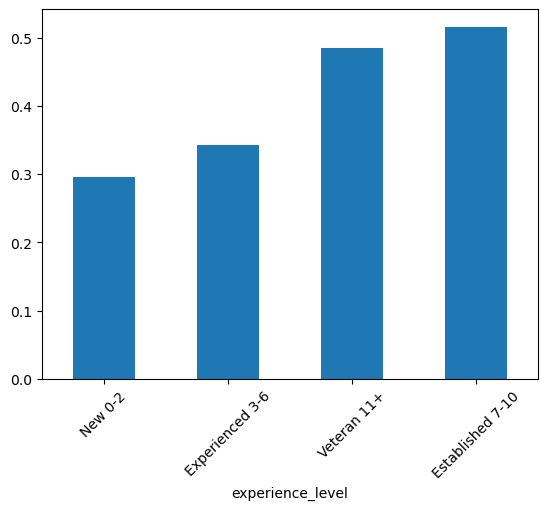

In [65]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each experience_level category
disat_pct_pvt = combined_cleaned.pivot_table(index='experience_level', values='dissatisfied', sort=True)

# sort the index in ascending order
disat_pct_pvt.sort_values(by="dissatisfied", inplace=True)

# Plot the results
disat_pct_pvt.plot(kind='bar', rot=45, legend=False)
plt.show()

**Observation from above**

From this initial analysis we can see that employees of experience greater than 7 year are more likely to resign due to job dissatisfaction. However, there is still plenty of missing data to consider, For Example, below it can be seen that there is 88 missing entres in the `experience_level` column which will likely effect the above results.

In [66]:
combined_cleaned['experience_level'].value_counts(dropna=False)

experience_level
New 0-2             193
Experienced 3-6     172
Veteran 11+         136
NaN                  88
Established 7-10     62
Name: count, dtype: int64